**As análises apresentadas ao decorrer desta atividade se basean no dataframe de Expectativa de vida no Brasil entre os anos de 1960 e 2015.**

In [3]:
# Importando as bibliotecas:

import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Importando o banco de dados:

df = pd.read_excel("/content/Life Expectancy Brazil.xlsx", parse_dates = True)
df.head

<bound method NDFrame.head of       País   Ano  Expectativa de vida (em anos)
0   Brasil  1960                      54.205463
1   Brasil  1961                      54.718707
2   Brasil  1962                      55.235659
3   Brasil  1963                      55.751390
4   Brasil  1964                      56.262951
5   Brasil  1965                      56.767366
6   Brasil  1966                      57.265683
7   Brasil  1967                      57.757927
8   Brasil  1968                      58.240683
9   Brasil  1969                      58.708024
10  Brasil  1970                      59.150585
11  Brasil  1971                      59.558000
12  Brasil  1972                      59.924805
13  Brasil  1973                      60.251512
14  Brasil  1974                      60.541098
15  Brasil  1975                      60.800512
16  Brasil  1976                      61.039122
17  Brasil  1977                      61.270829
18  Brasil  1978                      61.506463
19  Brasil

In [5]:
# Transformando a variável ano em float para ser utilizada nos gráficos que serão apresentados:

df['Ano'] = df['Ano'].astype(float)


In [6]:
# Apagando a coluna de País do banco de dados, pois ela não será necessária para realização das análises:

df.drop(["País"], axis=1, inplace=True)

In [7]:
# Conferindo o tipo das variável do banco de dados:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ano                            56 non-null     float64
 1   Expectativa de vida (em anos)  56 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


In [8]:
# Verificando algumas medidas estatíticas:

# Podemos observar que existem valores de expectativa de vida registrados ao logo de 56 anos;
# A média da expectativa de vida é aproximadamente de 65 anos ao logo do período observado;
# A maior expectativa de vida foi registrada no ano de 2015 (74,67 anos).


df.describe()

,Ano,Expectativa de vida (em anos)
count,56.000000,56.000000
mean,1987.500000,64.983395
std,16.309506,6.011508
min,1960.000000,54.205463
25%,1973.750000,60.468701
50%,1987.500000,64.422024
75%,2001.250000,70.556018
max,2015.000000,74.675878


Text(0.5, 1.0, 'Expectativa de vidas (anos)')

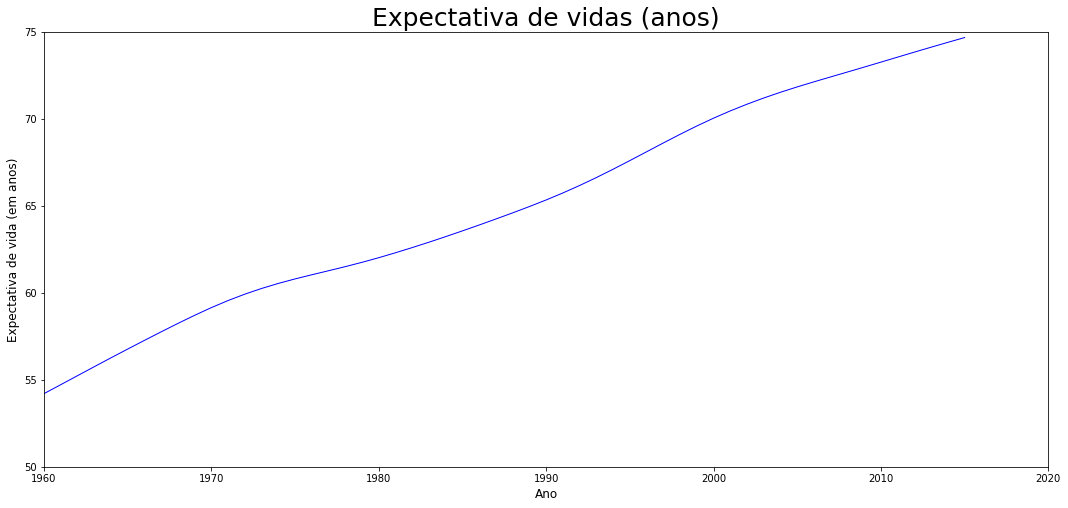

In [9]:
  # Plotagem do gráfico de expectativa de vida ao longo dos anos:

  # Pode-se observa que a existe um tendência crescente na expectativa de vida com o passar dos anos;
  # 
  
  plt.figure(figsize=(18,8))
  plt.plot(df['Ano'], df['Expectativa de vida (em anos)'], color='b', linewidth=1)
  plt.ylim([50, 75])
  plt.xlim([1960, 2020]) 
  plt.xlabel('Ano', fontsize = 12) 
  plt.ylabel('Expectativa de vida (em anos)', fontsize = 12)
  plt.title('Expectativa de vidas (anos)',fontsize = 25)

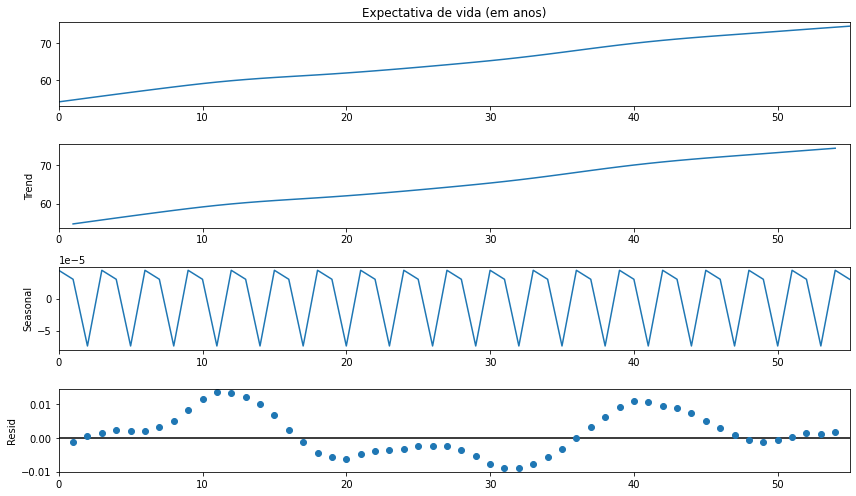

In [10]:
# Decomposição:

# Podemos observar a existência de resíduos no quarto gráfico entre os anos de observação 18 e 38 da série.

from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['Expectativa de vida (em anos)'], period=3)

# Plot decomposition
fig = decomp.plot();
fig.set_size_inches((12, 7))
plt.tight_layout();

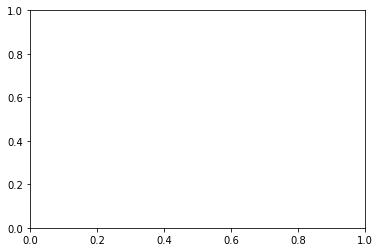

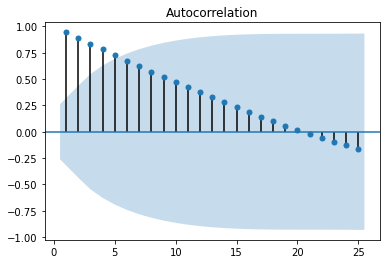

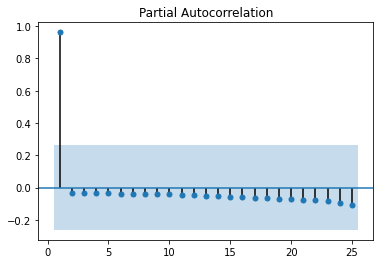

In [11]:
# Autocorrelação:

#Pode-se no terceiro gráfico que a primeira observação da autocorrelação terá valor máximo (1,0) e as demais apresentam valores que são reduzidos com aumento do número de observações.


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(df['Expectativa de vida (em anos)'], lags=25, zero=False);
plot_pacf(df['Expectativa de vida (em anos)'], lags=25, zero=False);